## José Paulo de Almeida Diniz - 1510910
## Lucas H. G. C. França - 1811457

## Enunciado do Trabalho

Vocês devem encontrar um bom modelo preditivo, variando:
* o número e conjunto de features (atributos) utilizados
* o método utilizado
* a configuração do algoritmo correspondente (e.g.: número k para nearest neighbors, profundidade para árvore de decisão)

Vocês devem listar algumas métricas de qualidade, tais como: precision, recall, accuracy e f1_score, e utilizar accuracy como base para a avaliação final, considerando a accuracy média de 10 iterações para cada configuração.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

random.seed(1001001)
%matplotlib inline 
plt.style.use('seaborn-whitegrid')
plt.rc('font', family='Arial')
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

## Parkinsons Data Set

Usando os dados da UC Irvine, podemos começar a implementar modelos de classificação. O primeiro passo, como sempre, é importar os dados e transformá-los num Pandas DataFrame.

In [2]:
# Data source description: 
# https://archive.ics.uci.edu/ml/datasets/Parkinsons

#url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data'
# comment the next line if Internet access is available
url = 'in.data/parkinsons.data'

In [3]:
dfParkinson = pd.read_csv(url)
dfParkinson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [4]:
outcome_column = 'status'
# status: 0: healthy, 1: Parkinson's
outcome_labels = {0: 'healthy', 1:'Parkinson`s'}
outcome_labels

{0: 'healthy', 1: 'Parkinson`s'}

In [5]:
label_counts = np.bincount(dfParkinson.status)
print(label_counts)

[ 48 147]


In [6]:
x = range(len(outcome_labels))
y = list(label_counts)
print(x,y)

range(0, 2) [48, 147]


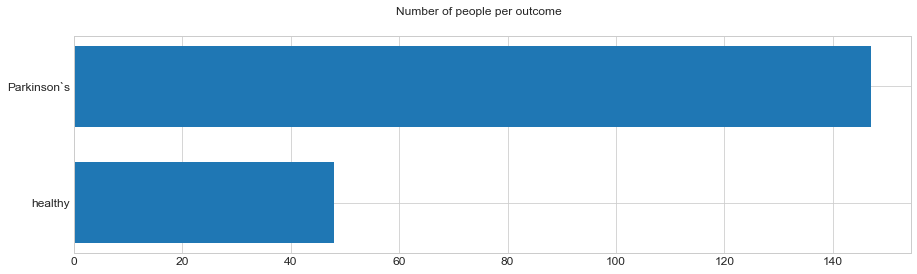

In [7]:
fig = plt.figure(figsize=(15,4))
plt.barh(x, y, height=0.7)
plt.yticks(x, outcome_labels.values())
fig.suptitle('Number of people per outcome')
plt.show()

## Selecionando as features
Inicialmente, utilizaremos todas as features do dataset

In [8]:
features = [col for col in dfParkinson.columns if col not in ['name', 'status']]
features

['MDVP:Fo(Hz)',
 'MDVP:Fhi(Hz)',
 'MDVP:Flo(Hz)',
 'MDVP:Jitter(%)',
 'MDVP:Jitter(Abs)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'RPDE',
 'DFA',
 'spread1',
 'spread2',
 'D2',
 'PPE']

In [9]:
# convert feature dataframe and label series to arrays
X = np.array(dfParkinson[features])
print(X[0, :])

Y = np.array(dfParkinson[outcome_column])
print(Y[0])

[ 1.199920e+02  1.573020e+02  7.499700e+01  7.840000e-03  7.000000e-05
  3.700000e-03  5.540000e-03  1.109000e-02  4.374000e-02  4.260000e-01
  2.182000e-02  3.130000e-02  2.971000e-02  6.545000e-02  2.211000e-02
  2.103300e+01  4.147830e-01  8.152850e-01 -4.813031e+00  2.664820e-01
  2.301442e+00  2.846540e-01]
1


In [10]:
from sklearn import neighbors
from sklearn import datasets
from sklearn import metrics
from sklearn import tree
from sklearn import svm
from sklearn.model_selection import train_test_split
from statistics import mean

Text(0, 0.5, 'Accuracy')

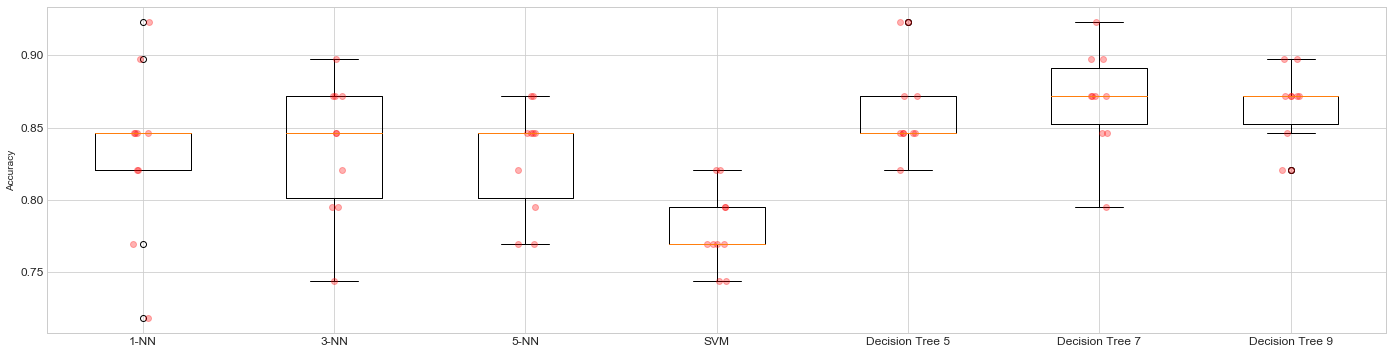

In [11]:
# run n times, generating 5 models each time
n = 10
acc_r=np.zeros((n,7))

# n iterations
for i in range(n):
    # separando dados de treino e de teste (20% de teste)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=dfParkinson[outcome_column])

    # configure 4 types of models
    nn1 = neighbors.KNeighborsClassifier(n_neighbors=1) # KNN com 1 vizinho
    nn3 = neighbors.KNeighborsClassifier(n_neighbors=3) # KNN com 3 vizinhos
    nn5 = neighbors.KNeighborsClassifier(n_neighbors=5) # KNN com 5 vizinhos
    svc = svm.SVC(gamma='auto') # SVM
    dt5 = tree.DecisionTreeClassifier(max_depth=5) # Decision Tree com 5 níveis de profundidade
    dt7 = tree.DecisionTreeClassifier(max_depth=7) # Decision Tree com 7 níveis de profundidade
    dt9 = tree.DecisionTreeClassifier(max_depth=9) # Decision Tree com 9 níveis de profundidade
    
    # train each model
    nn1.fit(X_train,Y_train)
    nn3.fit(X_train,Y_train)
    nn5.fit(X_train,Y_train)
    svc.fit(X_train,Y_train)
    dt5.fit(X_train,Y_train)
    dt7.fit(X_train,Y_train)
    dt9.fit(X_train,Y_train)
    
    # test each model
    Yhat_nn1=nn1.predict(X_test)
    Yhat_nn3=nn3.predict(X_test)
    Yhat_nn5=nn5.predict(X_test)
    Yhat_svc=svc.predict(X_test)
    Yhat_dt5=dt5.predict(X_test)
    Yhat_dt7=dt7.predict(X_test)
    Yhat_dt9=dt9.predict(X_test)
    
    # accuracy of each model at this iteration
    acc_r[i][0] = metrics.accuracy_score(Y_test, Yhat_nn1)
    acc_r[i][1] = metrics.accuracy_score(Y_test, Yhat_nn3)
    acc_r[i][2] = metrics.accuracy_score(Y_test, Yhat_nn5)
    acc_r[i][3] = metrics.accuracy_score(Y_test, Yhat_svc)
    acc_r[i][4] = metrics.accuracy_score(Y_test, Yhat_dt5)
    acc_r[i][5] = metrics.accuracy_score(Y_test, Yhat_dt7)
    acc_r[i][6] = metrics.accuracy_score(Y_test, Yhat_dt9)
    
plt.figure(figsize=(24,6))
plt.boxplot(acc_r)
for i in range(7):
    xderiv = (i+1) * np.ones(acc_r[:,i].shape) + (np.random.rand(n,)-0.5) * 0.1
    plt.plot(xderiv, acc_r[:,i], 'ro', alpha=0.3)
    
ax = plt.gca()
ax.set_xticklabels(['1-NN', '3-NN', '5-NN', 'SVM', 'Decision Tree 5', 'Decision Tree 7', 'Decision Tree 9'])
plt.ylabel('Accuracy')

In [12]:
best_models = {}
labels = ['1-NN', '3-NN', '5-NN', 'SVM', 'Decision Tree 5', 'Decision Tree 7', 'Decision Tree 9']

best_av_acc = 0
best_av_acc_index = 0

for i in range(7):
    average_accuracy = mean(acc_r[:,i])
    print(average_accuracy)
    if average_accuracy > best_av_acc:
        best_av_acc = average_accuracy
        best_av_acc_index = i
                
print(labels[best_av_acc_index])
best_models["all"] = [labels[best_av_acc_index], best_av_acc]

0.8333333333333334
0.8358974358974359
0.8282051282051281
0.7794871794871795
0.8641025641025641
0.8692307692307693
0.8641025641025641
Decision Tree 7


In [13]:
print(metrics.classification_report(Y_test, Yhat_dt5, target_names=outcome_labels.values()))

              precision    recall  f1-score   support

     healthy       1.00      0.70      0.82        10
 Parkinson`s       0.91      1.00      0.95        29

   micro avg       0.92      0.92      0.92        39
   macro avg       0.95      0.85      0.89        39
weighted avg       0.93      0.92      0.92        39



## Selecionando features filtradas
Features selecionadas após filtragem, como descrito na sessão III do artigo Suitability of dysphonia measurements for telemonitoring of Parkinson's disease

In [14]:
features = ['MDVP:Jitter(Abs)', 'Jitter:DDP', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'D2', 'PPE']
features

['MDVP:Jitter(Abs)',
 'Jitter:DDP',
 'MDVP:APQ',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'RPDE',
 'DFA',
 'D2',
 'PPE']

In [15]:
# convert feature dataframe and label series to arrays
X = np.array(dfParkinson[features])
print(X[0, :])

Y = np.array(dfParkinson[outcome_column])
print(Y[0])

[7.000000e-05 1.109000e-02 2.971000e-02 6.545000e-02 2.211000e-02
 2.103300e+01 4.147830e-01 8.152850e-01 2.301442e+00 2.846540e-01]
1


Text(0, 0.5, 'Accuracy')

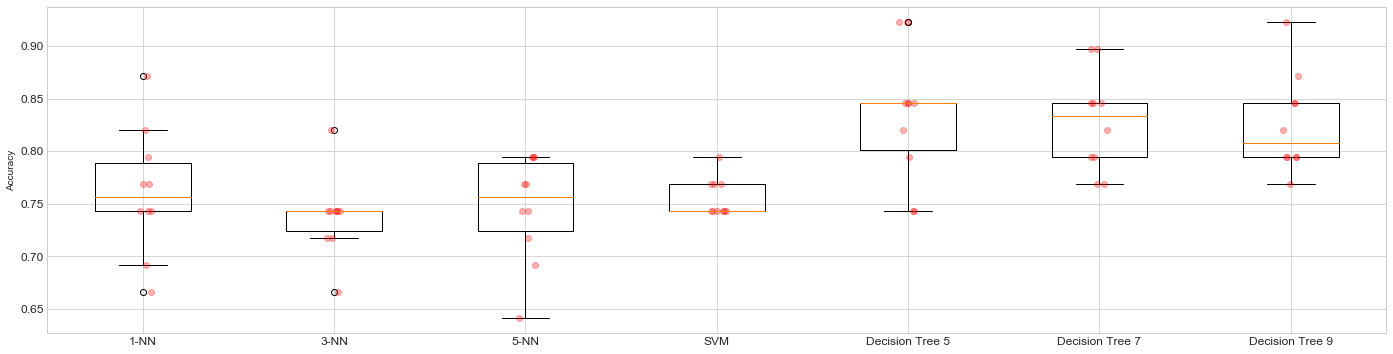

In [16]:
# run n times, generating 5 models each time
n = 10
acc_r=np.zeros((n,7))

# n iterations
for i in range(n):
    # separando dados de treino e de teste (20% de teste)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=dfParkinson[outcome_column])

    # configure 4 types of models
    nn1 = neighbors.KNeighborsClassifier(n_neighbors=1) # KNN com 1 vizinho
    nn3 = neighbors.KNeighborsClassifier(n_neighbors=3) # KNN com 3 vizinhos
    nn5 = neighbors.KNeighborsClassifier(n_neighbors=5) # KNN com 5 vizinhos
    svc = svm.SVC(gamma='auto') # SVM
    dt5 = tree.DecisionTreeClassifier(max_depth=5) # Decision Tree com 5 níveis de profundidade
    dt7 = tree.DecisionTreeClassifier(max_depth=7) # Decision Tree com 7 níveis de profundidade
    dt9 = tree.DecisionTreeClassifier(max_depth=9) # Decision Tree com 9 níveis de profundidade
    
    # train each model
    nn1.fit(X_train,Y_train)
    nn3.fit(X_train,Y_train)
    nn5.fit(X_train,Y_train)
    svc.fit(X_train,Y_train)
    dt5.fit(X_train,Y_train)
    dt7.fit(X_train,Y_train)
    dt9.fit(X_train,Y_train)
    
    # test each model
    Yhat_nn1=nn1.predict(X_test)
    Yhat_nn3=nn3.predict(X_test)
    Yhat_nn5=nn5.predict(X_test)
    Yhat_svc=svc.predict(X_test)
    Yhat_dt5=dt5.predict(X_test)
    Yhat_dt7=dt7.predict(X_test)
    Yhat_dt9=dt9.predict(X_test)
    
    # accuracy of each model at this iteration
    acc_r[i][0] = metrics.accuracy_score(Y_test, Yhat_nn1)
    acc_r[i][1] = metrics.accuracy_score(Y_test, Yhat_nn3)
    acc_r[i][2] = metrics.accuracy_score(Y_test, Yhat_nn5)
    acc_r[i][3] = metrics.accuracy_score(Y_test, Yhat_svc)
    acc_r[i][4] = metrics.accuracy_score(Y_test, Yhat_dt5)
    acc_r[i][5] = metrics.accuracy_score(Y_test, Yhat_dt7)
    acc_r[i][6] = metrics.accuracy_score(Y_test, Yhat_dt9)
    
plt.figure(figsize=(24,6))
plt.boxplot(acc_r)
for i in range(7):
    xderiv = (i+1) * np.ones(acc_r[:,i].shape) + (np.random.rand(n,)-0.5) * 0.1
    plt.plot(xderiv, acc_r[:,i], 'ro', alpha=0.3)
    
ax = plt.gca()
ax.set_xticklabels(['1-NN', '3-NN', '5-NN', 'SVM', 'Decision Tree 5', 'Decision Tree 7', 'Decision Tree 9'])
plt.ylabel('Accuracy')

In [17]:
best_av_acc = 0
best_av_acc_index = 0

for i in range(7):
    average_accuracy = mean(acc_r[:,i])
    print(average_accuracy)
    if average_accuracy > best_av_acc:
        best_av_acc = average_accuracy
        best_av_acc_index = i
                
print(labels[best_av_acc_index])
best_models["filtered"] = [labels[best_av_acc_index], best_av_acc]

0.7615384615384615
0.7384615384615385
0.7461538461538462
0.7564102564102564
0.8333333333333334
0.8282051282051281
0.8256410256410256
Decision Tree 5


In [18]:
print(metrics.classification_report(Y_test, Yhat_dt7, target_names=outcome_labels.values()))

              precision    recall  f1-score   support

     healthy       0.70      0.70      0.70        10
 Parkinson`s       0.90      0.90      0.90        29

   micro avg       0.85      0.85      0.85        39
   macro avg       0.80      0.80      0.80        39
weighted avg       0.85      0.85      0.85        39



## Selecionando RDPE

In [19]:
features = ['RPDE']
features

['RPDE']

In [20]:
# convert feature dataframe and label series to arrays
X = np.array(dfParkinson[features])
print(X[0, :])

Y = np.array(dfParkinson[outcome_column])
print(Y[0])

[0.414783]
1


Text(0, 0.5, 'Accuracy')

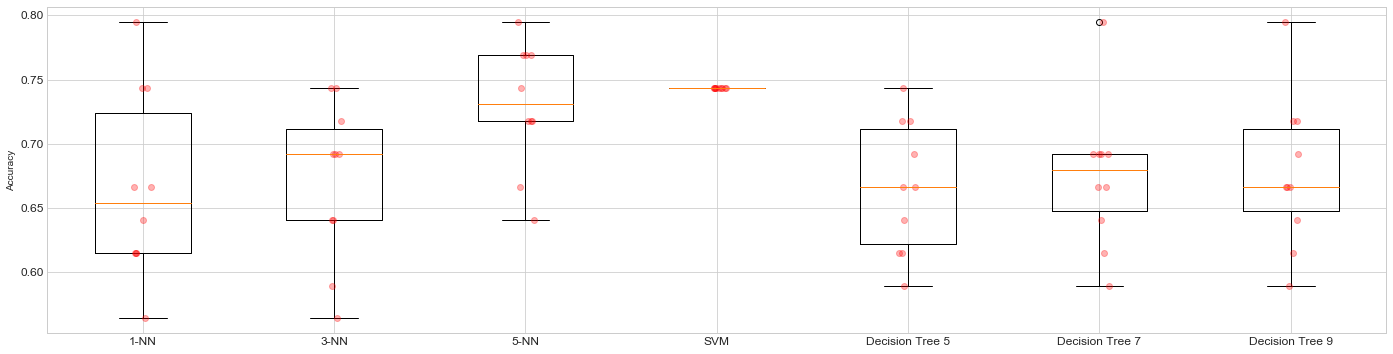

In [21]:
# run n times, generating 5 models each time
n = 10
acc_r=np.zeros((n,7))

# n iterations
for i in range(n):
    # separando dados de treino e de teste (20% de teste)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=dfParkinson[outcome_column])

    # configure 4 types of models
    nn1 = neighbors.KNeighborsClassifier(n_neighbors=1) # KNN com 1 vizinho
    nn3 = neighbors.KNeighborsClassifier(n_neighbors=3) # KNN com 3 vizinhos
    nn5 = neighbors.KNeighborsClassifier(n_neighbors=5) # KNN com 5 vizinhos
    svc = svm.SVC(gamma='auto') # SVM
    dt5 = tree.DecisionTreeClassifier(max_depth=5) # Decision Tree com 5 níveis de profundidade
    dt7 = tree.DecisionTreeClassifier(max_depth=7) # Decision Tree com 7 níveis de profundidade
    dt9 = tree.DecisionTreeClassifier(max_depth=9) # Decision Tree com 9 níveis de profundidade
    
    # train each model
    nn1.fit(X_train,Y_train)
    nn3.fit(X_train,Y_train)
    nn5.fit(X_train,Y_train)
    svc.fit(X_train,Y_train)
    dt5.fit(X_train,Y_train)
    dt7.fit(X_train,Y_train)
    dt9.fit(X_train,Y_train)
    
    # test each model
    Yhat_nn1=nn1.predict(X_test)
    Yhat_nn3=nn3.predict(X_test)
    Yhat_nn5=nn5.predict(X_test)
    Yhat_svc=svc.predict(X_test)
    Yhat_dt5=dt5.predict(X_test)
    Yhat_dt7=dt7.predict(X_test)
    Yhat_dt9=dt9.predict(X_test)
    
    # accuracy of each model at this iteration
    acc_r[i][0] = metrics.accuracy_score(Y_test, Yhat_nn1)
    acc_r[i][1] = metrics.accuracy_score(Y_test, Yhat_nn3)
    acc_r[i][2] = metrics.accuracy_score(Y_test, Yhat_nn5)
    acc_r[i][3] = metrics.accuracy_score(Y_test, Yhat_svc)
    acc_r[i][4] = metrics.accuracy_score(Y_test, Yhat_dt5)
    acc_r[i][5] = metrics.accuracy_score(Y_test, Yhat_dt7)
    acc_r[i][6] = metrics.accuracy_score(Y_test, Yhat_dt9)
    
plt.figure(figsize=(24,6))
plt.boxplot(acc_r)
for i in range(7):
    xderiv = (i+1) * np.ones(acc_r[:,i].shape) + (np.random.rand(n,)-0.5) * 0.1
    plt.plot(xderiv, acc_r[:,i], 'ro', alpha=0.3)
    
ax = plt.gca()
ax.set_xticklabels(['1-NN', '3-NN', '5-NN', 'SVM', 'Decision Tree 5', 'Decision Tree 7', 'Decision Tree 9'])
plt.ylabel('Accuracy')

In [22]:
best_av_acc = 0
best_av_acc_index = 0

for i in range(7):
    average_accuracy = mean(acc_r[:,i])
    print(average_accuracy)
    if average_accuracy > best_av_acc:
        best_av_acc = average_accuracy
        best_av_acc_index = i
                
print(labels[best_av_acc_index])
best_models["RDPE"] = [labels[best_av_acc_index], best_av_acc]

0.6666666666666666
0.6717948717948719
0.7307692307692308
0.7435897435897436
0.6666666666666666
0.6743589743589744
0.676923076923077
SVM


In [23]:
print(metrics.classification_report(Y_test, Yhat_svc, target_names=outcome_labels.values()))

              precision    recall  f1-score   support

     healthy       0.00      0.00      0.00        10
 Parkinson`s       0.74      1.00      0.85        29

   micro avg       0.74      0.74      0.74        39
   macro avg       0.37      0.50      0.43        39
weighted avg       0.55      0.74      0.63        39



C:\Users\jpald\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\jpald\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\jpald\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Selecionando RDPE, DFA e PPE

In [24]:
features = ['RPDE', 'DFA', 'PPE']
features

['RPDE', 'DFA', 'PPE']

In [25]:
# convert feature dataframe and label series to arrays
X = np.array(dfParkinson[features])
print(X[0, :])

Y = np.array(dfParkinson[outcome_column])
print(Y[0])

[0.414783 0.815285 0.284654]
1


Text(0, 0.5, 'Accuracy')

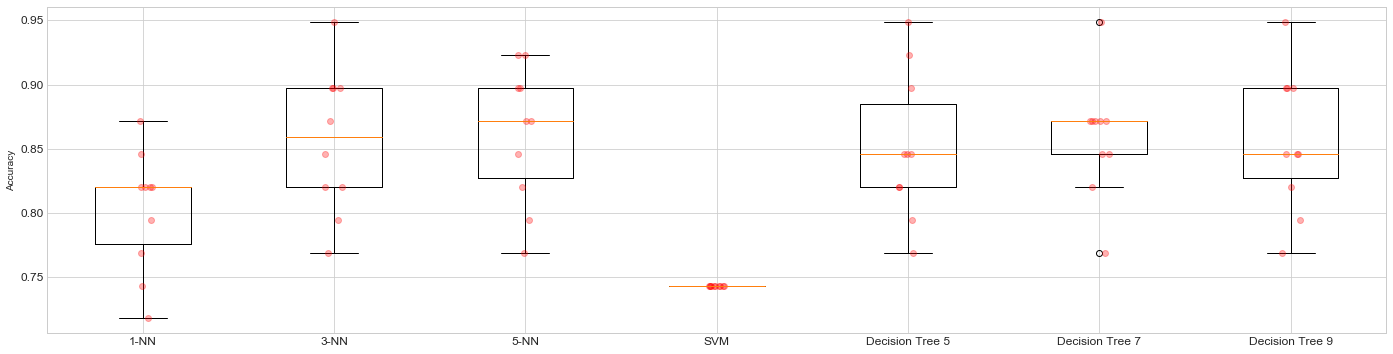

In [26]:
# run n times, generating 5 models each time
n = 10
acc_r=np.zeros((n,7))

# n iterations
for i in range(n):
    # separando dados de treino e de teste (20% de teste)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=dfParkinson[outcome_column])

    # configure 4 types of models
    nn1 = neighbors.KNeighborsClassifier(n_neighbors=1) # KNN com 1 vizinho
    nn3 = neighbors.KNeighborsClassifier(n_neighbors=3) # KNN com 3 vizinhos
    nn5 = neighbors.KNeighborsClassifier(n_neighbors=5) # KNN com 5 vizinhos
    svc = svm.SVC(gamma='auto') # SVM
    dt5 = tree.DecisionTreeClassifier(max_depth=5) # Decision Tree com 5 níveis de profundidade
    dt7 = tree.DecisionTreeClassifier(max_depth=7) # Decision Tree com 7 níveis de profundidade
    dt9 = tree.DecisionTreeClassifier(max_depth=9) # Decision Tree com 9 níveis de profundidade
    
    # train each model
    nn1.fit(X_train,Y_train)
    nn3.fit(X_train,Y_train)
    nn5.fit(X_train,Y_train)
    svc.fit(X_train,Y_train)
    dt5.fit(X_train,Y_train)
    dt7.fit(X_train,Y_train)
    dt9.fit(X_train,Y_train)
    
    # test each model
    Yhat_nn1=nn1.predict(X_test)
    Yhat_nn3=nn3.predict(X_test)
    Yhat_nn5=nn5.predict(X_test)
    Yhat_svc=svc.predict(X_test)
    Yhat_dt5=dt5.predict(X_test)
    Yhat_dt7=dt7.predict(X_test)
    Yhat_dt9=dt9.predict(X_test)
    
    # accuracy of each model at this iteration
    acc_r[i][0] = metrics.accuracy_score(Y_test, Yhat_nn1)
    acc_r[i][1] = metrics.accuracy_score(Y_test, Yhat_nn3)
    acc_r[i][2] = metrics.accuracy_score(Y_test, Yhat_nn5)
    acc_r[i][3] = metrics.accuracy_score(Y_test, Yhat_svc)
    acc_r[i][4] = metrics.accuracy_score(Y_test, Yhat_dt5)
    acc_r[i][5] = metrics.accuracy_score(Y_test, Yhat_dt7)
    acc_r[i][6] = metrics.accuracy_score(Y_test, Yhat_dt9)
    
plt.figure(figsize=(24,6))
plt.boxplot(acc_r)
for i in range(7):
    xderiv = (i+1) * np.ones(acc_r[:,i].shape) + (np.random.rand(n,)-0.5) * 0.1
    plt.plot(xderiv, acc_r[:,i], 'ro', alpha=0.3)
    
ax = plt.gca()
ax.set_xticklabels(['1-NN', '3-NN', '5-NN', 'SVM', 'Decision Tree 5', 'Decision Tree 7', 'Decision Tree 9'])
plt.ylabel('Accuracy')

In [27]:
best_av_acc = 0
best_av_acc_index = 0

for i in range(7):
    average_accuracy = mean(acc_r[:,i])
    print(average_accuracy)
    if average_accuracy > best_av_acc:
        best_av_acc = average_accuracy
        best_av_acc_index = i
                
print(labels[best_av_acc_index])
best_models["RDPE, DFA e PPE"] = [labels[best_av_acc_index], best_av_acc]

0.8025641025641026
0.8564102564102564
0.8615384615384616
0.7435897435897436
0.8512820512820513
0.858974358974359
0.8564102564102564
5-NN


In [28]:
print(metrics.classification_report(Y_test, Yhat_nn3, target_names=outcome_labels.values()))

              precision    recall  f1-score   support

     healthy       0.88      0.70      0.78        10
 Parkinson`s       0.90      0.97      0.93        29

   micro avg       0.90      0.90      0.90        39
   macro avg       0.89      0.83      0.86        39
weighted avg       0.90      0.90      0.89        39



## Selecionando HNR, RPDE, DFA e PPE

In [29]:
features = ['HNR', 'RPDE', 'DFA', 'PPE']
features

['HNR', 'RPDE', 'DFA', 'PPE']

In [30]:
# convert feature dataframe and label series to arrays
X = np.array(dfParkinson[features])
print(X[0, :])

Y = np.array(dfParkinson[outcome_column])
print(Y[0])

[21.033     0.414783  0.815285  0.284654]
1


Text(0, 0.5, 'Accuracy')

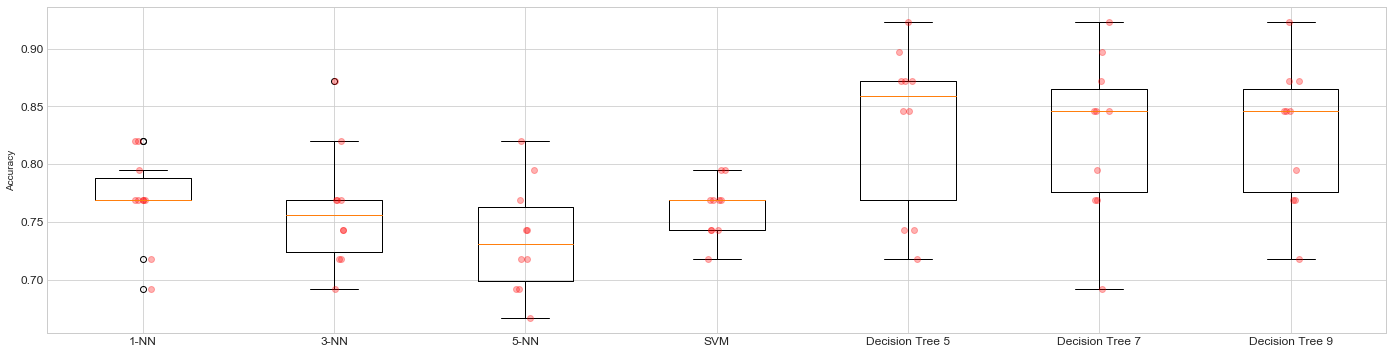

In [31]:
# run n times, generating 5 models each time
n = 10
acc_r=np.zeros((n,7))

# n iterations
for i in range(n):
    # separando dados de treino e de teste (20% de teste)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=dfParkinson[outcome_column])

    # configure 4 types of models
    nn1 = neighbors.KNeighborsClassifier(n_neighbors=1) # KNN com 1 vizinho
    nn3 = neighbors.KNeighborsClassifier(n_neighbors=3) # KNN com 3 vizinhos
    nn5 = neighbors.KNeighborsClassifier(n_neighbors=5) # KNN com 5 vizinhos
    svc = svm.SVC(gamma='auto') # SVM
    dt5 = tree.DecisionTreeClassifier(max_depth=5) # Decision Tree com 5 níveis de profundidade
    dt7 = tree.DecisionTreeClassifier(max_depth=7) # Decision Tree com 7 níveis de profundidade
    dt9 = tree.DecisionTreeClassifier(max_depth=9) # Decision Tree com 9 níveis de profundidade
    
    # train each model
    nn1.fit(X_train,Y_train)
    nn3.fit(X_train,Y_train)
    nn5.fit(X_train,Y_train)
    svc.fit(X_train,Y_train)
    dt5.fit(X_train,Y_train)
    dt7.fit(X_train,Y_train)
    dt9.fit(X_train,Y_train)
    
    # test each model
    Yhat_nn1=nn1.predict(X_test)
    Yhat_nn3=nn3.predict(X_test)
    Yhat_nn5=nn5.predict(X_test)
    Yhat_svc=svc.predict(X_test)
    Yhat_dt5=dt5.predict(X_test)
    Yhat_dt7=dt7.predict(X_test)
    Yhat_dt9=dt9.predict(X_test)
    
    # accuracy of each model at this iteration
    acc_r[i][0] = metrics.accuracy_score(Y_test, Yhat_nn1)
    acc_r[i][1] = metrics.accuracy_score(Y_test, Yhat_nn3)
    acc_r[i][2] = metrics.accuracy_score(Y_test, Yhat_nn5)
    acc_r[i][3] = metrics.accuracy_score(Y_test, Yhat_svc)
    acc_r[i][4] = metrics.accuracy_score(Y_test, Yhat_dt5)
    acc_r[i][5] = metrics.accuracy_score(Y_test, Yhat_dt7)
    acc_r[i][6] = metrics.accuracy_score(Y_test, Yhat_dt9)
    
plt.figure(figsize=(24,6))
plt.boxplot(acc_r)
for i in range(7):
    xderiv = (i+1) * np.ones(acc_r[:,i].shape) + (np.random.rand(n,)-0.5) * 0.1
    plt.plot(xderiv, acc_r[:,i], 'ro', alpha=0.3)
    
ax = plt.gca()
ax.set_xticklabels(['1-NN', '3-NN', '5-NN', 'SVM', 'Decision Tree 5', 'Decision Tree 7', 'Decision Tree 9'])
plt.ylabel('Accuracy')

In [32]:
best_av_acc = 0
best_av_acc_index = 0

for i in range(7):
    average_accuracy = mean(acc_r[:,i])
    print(average_accuracy)
    if average_accuracy > best_av_acc:
        best_av_acc = average_accuracy
        best_av_acc_index = i
                
print(labels[best_av_acc_index])
best_models["HNR, RPDE, DFA e PPE"] = [labels[best_av_acc_index], best_av_acc]

0.7692307692307693
0.7615384615384615
0.735897435897436
0.7615384615384615
0.8333333333333334
0.8256410256410256
0.8256410256410256
Decision Tree 5


In [33]:
print(metrics.classification_report(Y_test, Yhat_dt7, target_names=outcome_labels.values()))

              precision    recall  f1-score   support

     healthy       0.77      1.00      0.87        10
 Parkinson`s       1.00      0.90      0.95        29

   micro avg       0.92      0.92      0.92        39
   macro avg       0.88      0.95      0.91        39
weighted avg       0.94      0.92      0.93        39



In [34]:
for item in best_models.items():
    print(item)

('all', ['Decision Tree 7', 0.8692307692307693])
('filtered', ['Decision Tree 5', 0.8333333333333334])
('RDPE', ['SVM', 0.7435897435897436])
('RDPE, DFA e PPE', ['5-NN', 0.8615384615384616])
('HNR, RPDE, DFA e PPE', ['Decision Tree 5', 0.8333333333333334])
